<font face="黑体" size=5>月度产销差漏损率分析报告图表</font> 

***author: 谢杰***<br/>

In [1]:
#调入常用包
%matplotlib inline
import seaborn as sns
#sns.set_theme(style="whitegrid")
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
mpl.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import numpy as np
import datetime as dt
import sys
import os
#查看当前目录
os.getcwd()

'C:\\Users\\xiejie\\mypyworks'

## 水量平衡表旭日图

In [2]:
import pyecharts
print(pyecharts.__version__)
#水量平衡表旭日图
from pyecharts.charts import Sunburst
from pyecharts import options as opts

1.9.0


In [3]:
data = [
    {
        "name": "注册用水量",        
        "children": [
            {"name": "计费用水",
                 "children": [                    
                        {"name": "计量用水", "value": 1187494203, "percent":35},
                        {"name": "未计量用水", "value": 53351685, },
                    ],
            },
            { "name": "免费用水", "itemStyle": {"color": "#794752"},             
                "children": [                    
                    {"name": "计量", "value": 0,"itemStyle": {"color": "#794752"}, },
                    {"name": "未计量", "value": 118913235,"itemStyle": {"color": "#794752"},},
                ],
            },
        ],
    },
    {
        "name": "漏损水量",        
        "children": [
            {
                "name": "漏失",               
                "children": [
                    {
                        "name": "明漏",
                        "value": 0,                       
                    },
                    {
                        "name": "暗漏",
                             "children": [                    
                                {"name": "主动检出暗漏点", "value": 0, },
                                {"name": "其它", "value": 174714223.66, },
                            ],
                       
                    },
                    {
                        "name": "水箱、水池的\n渗漏和溢流",
                        "value": 0,                        
                    },                    
                ],
            },
            {
                "name": "计量误差",                
                "children": [
                    {"name": "总分表差", "value": 43661780},
                    {"name": "表具误差", "value": 8504039.48,},
                ],
            },
            {
                "name": "其他",               
                "children": [
                    {"name": "未注册用户和用户拒查", "value": 17681498.86, },
                    
                ],
            },            
        ],
    },
    
]

sunburst = (
    Sunburst(init_opts=opts.InitOpts(width="600px", height="600px",bg_color='white'))
    .add(series_name="", data_pair=data, radius=['10%', "95%"],
        highlight_policy="descendant",
        sort_="null",
        levels=[
            {},
            {"itemStyle": {"borderWidth": 2},"label": {"rotate": "tangential"}, },
            {},
            { "label": { "padding": 1, "silent": False}, "label": {"align": "left"},
                "itemStyle": {"borderWidth": 2},
            },
            { "label": { "padding": 1, "silent": False},
                "itemStyle": {"borderWidth": 2},
            }
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="水量平衡表细项比例示意图",pos_left='left',),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts(),),
                     ),)
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    
    
)
sunburst.render_notebook()

In [4]:
from pyecharts import options as opts
from pyecharts.charts import TreeMap

data = [
    {
        "name": "注册用水量",        
        "children": [
            {"name": "计费用水",
                 "children": [                    
                        {"name": "计量用水", "value": 1187494203},
                        {"name": "未计量用水", "value": 53351685, },
                    ],
            },
            { "name": "免费用水",             
                "children": [                    
                    {"name": "计量", "value": 0,},
                    {"name": "未计量", "value": 118913235,},
                ],
            },
        ],
    },
    {
        "name": "漏损水量",        
        "children": [
            {
                "name": "漏失",               
                "children": [
                    {
                        "name": "明漏",
                        "value": 0,                       
                    },
                    {
                        "name": "暗漏",
                             "children": [                    
                                {"name": "主动检出暗漏点", "value": 0, },
                                {"name": "其它", "value": 174714223.66, },
                            ],
                       
                    },
                    {
                        "name": "水箱、水池的\n渗漏和溢流",
                        "value": 0,                        
                    },                    
                ],
            },
            {
                "name": "计量误差",                
                "children": [
                    {"name": "总分表差", "value": 43661780},
                    {"name": "表具误差", "value": 8504039.48,},
                ],
            },
            {
                "name": "其他",               
                "children": [
                    {"name": "未注册用户和用户拒查", "value": 17681498.86, },
                    
                ],
            },            
        ],
    },
    
]

c1 = (
    TreeMap(init_opts=opts.InitOpts(width="800px", height="600px",bg_color='white'))
    .add(series_name="水量", data=data,leaf_depth=2,
        levels=[
            opts.TreeMapLevelsOpts(
                treemap_itemstyle_opts=opts.TreeMapItemStyleOpts(
                    border_color="#555", border_width=4, gap_width=4
                )
            ),
            opts.TreeMapLevelsOpts(
                color_saturation=[0.3, 0.6],
                treemap_itemstyle_opts=opts.TreeMapItemStyleOpts(
                    border_color_saturation=0.7, gap_width=2, border_width=2
                ),
            ),
            opts.TreeMapLevelsOpts(
                color_saturation=[0.3, 0.5],
                treemap_itemstyle_opts=opts.TreeMapItemStyleOpts(
                    border_color_saturation=0.6, gap_width=1
                ),
            ),
            opts.TreeMapLevelsOpts(color_saturation=[0.3, 0.5]),
        ],)
    .set_global_opts(title_opts=opts.TitleOpts(title="测试",pos_left='left',),
                     toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts(),),
                     ),)
    #.set_series_opts(label_opts=opts.LabelOpts(formatter="{a}"))
    
    
)
c1.render_notebook()

## 对标条形图

In [5]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
# 内置主题类型可查看 pyecharts.globals.ThemeType
from pyecharts.globals import ThemeType
danwei=['荔湾西片(中区)','体育中心片(东区)','员村片(东区)','芳村东片(南区)','芳村西片(南区)','机场广园片(北区)']
jihua=[36.53,18.40,17.74,40.41,39.15,28.89]
wancheng=[31.99,18.01,18.06,39.27,40.37,32.45]
tongqi = [34.53,17.80,18.71,38.66,34.93,26.33]
c2 = (
    Bar(init_opts=opts.InitOpts(width="1000px", height="600px",bg_color='white'))#theme=ThemeType.white,
    .add_xaxis(danwei)
    .add_yaxis("计划",jihua,
               itemstyle_opts=opts.ItemStyleOpts(color='#339999'),
              label_opts=opts.LabelOpts(position='inside'))
    .add_yaxis("完成",wancheng,
               itemstyle_opts=opts.ItemStyleOpts(color='#339933'),
               label_opts=opts.LabelOpts(position='inside',color='#333333'),               
               stack="stack1")#
    .add_yaxis("同期",[-x for x in tongqi],itemstyle_opts=opts.ItemStyleOpts(color='#FF9900'),stack="stack1",
               label_opts=opts.LabelOpts(formatter=JsCode(
                                            """function(params) {
                                             return Math.abs(params.data).toFixed(2);
                                            }
                                        """ ),
                                         position='left',color='#333333'
                                              )) 
    .set_global_opts(toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
                    xaxis_opts=opts.AxisOpts(type_='value',interval=10,
                                             splitline_opts=opts.SplitLineOpts(is_show=True),axislabel_opts=opts.LabelOpts(formatter=JsCode(
                    """function(params){
                    return Math.abs(params);
                    }                    
                    """ ))),
                     yaxis_opts=opts.AxisOpts(type_='category',axistick_opts=opts.AxisTickOpts(is_show=False))
                    )
    .reversal_axis()
)
c2.render_notebook()

In [6]:
zone2 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',sheet_name=2)
zone2=zone2[np.isfinite(zone2['综合产销差'])==1].sort_values('综合产销差',ascending=True)

In [11]:
zone2

,分公司颜色,编号,名称,供水量,在册售水量,售水量,免费水量,综合产销差,同比下降,在册产销差,同比下降.1,分公司,非重点同比下降
27,#ff0000,北5,石门石井,472.83,678.94,695.74,0.72,-47.14,-29.34,-43.590720,-50.099788,北区,NaN
23,#ff0000,北1,机场花都,1552.70,1592.70,1593.80,67.79,-2.65,-2.68,-2.576158,-2.817404,北区,NaN
10,#0080ff,东8,罗岗片区,220.38,225.08,225.80,1.78,-2.46,1.41,-2.132680,0.239330,东区,NaN
29,#ff0000,北7,白云新城,275.83,273.35,277.96,128.46,-0.77,-17.19,0.899105,-18.819676,北区,2.33
2,#219167,中4,二沙岛片,66.14,58.93,62.71,6.21,5.19,-3.29,10.901119,-4.135509,中区,NaN
14,#003366,南2,赤沙仑头北山,289.14,271.63,271.72,14.23,6.02,3.48,6.055890,3.354619,南区,NaN
17,#003366,南5,大学城,540.88,503.11,504.10,19.80,6.80,0.16,6.983065,0.190917,南区,NaN
9,#0080ff,东7,文冲片区,3240.38,2963.19,2978.42,100.90,8.08,-0.14,8.554244,-0.906412,东区,NaN
26,#ff0000,北4,嘉禾均禾,4515.81,4098.84,4133.71,140.00,8.46,1.92,9.233559,-4.260115,北区,NaN
16,#003366,南4,长洲岛,152.28,137.57,137.57,4.11,9.66,-0.06,9.659837,-0.331463,南区,NaN


In [8]:
#二级分区图产销差排名新画法，替换月份
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
from pyecharts.render import make_snapshot
from snapshot_phantomjs import snapshot
x_data=list(zone2['编号'])
chalv =[dict(value=x,tongbi=y) for x,y in zip(zone2['综合产销差'],zone2['同比下降'])]
gongshui = list(zone2['供水量'])
shoushui = list(zone2['售水量'])

# names = ['测试分区'+str(i) for i in range(1,21)]
# zongbiao = np.random.randint(80,500,20)
# chalv = np.around(np.random.normal(0.2,0.1,20)*100,2)
# fenbiao =np.around(zongbiao * (1-chalv/100),0)

# test = {"names": names, 
#         "zongbiao": zongbiao , 
#         "chalv": chalv,
#        "fenbiao":fenbiao}
# test=pd.DataFrame(test)
# test.sort_values('chalv',ascending=False,inplace=True)


# x_data = list(test['names'])

bar = (
    Bar(init_opts=opts.InitOpts(width="800px", height="1000px",bg_color='white'))
    .add_xaxis(xaxis_data=x_data)
    .reversal_axis()
    .extend_axis(              
        yaxis=opts.AxisOpts(
            type_="category",
            is_show = False,
        ),
    )
    .extend_axis(        
        yaxis=opts.AxisOpts(
            type_="category",
            is_show = False,
        ),
    )
    .extend_axis(
        xaxis=opts.AxisOpts(
            name="产销差率(%)",
            type_="value",
            name_gap = 12,
            min_=0,
            max_=50,
            
        )
    )
    .add_yaxis(
        series_name="供水量",
        y_axis=gongshui,
        gap = '-100%',
        bar_width = '50%',
        #z=0,
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#90b65c')
    )

    .add_yaxis(
        series_name="产销差率",
        y_axis=chalv,
        xaxis_index=1,
        yaxis_index=1,
        gap = '-100%',
        bar_width = '25%',
        #z=3,
        label_opts=opts.LabelOpts(formatter=JsCode(  
                                            """function(params) {
                                             str = params.data.value.toFixed(2)+'%';
                                            return str
                                            }
                                        """ ),
                                               position="bottom",
                                  horizontal_align = "left",
                                  #vertical_align = "middle",
                                 #distance = 20
                                 ),
        itemstyle_opts=opts.ItemStyleOpts(color='#b54f4d')
    )
    .add_yaxis(
        series_name="售水量",
        y_axis=shoushui,
        yaxis_index=2,
        gap = '-100%',
        bar_width = '30%', 
        #z=2,
        label_opts=opts.LabelOpts(is_show=False),
        itemstyle_opts=opts.ItemStyleOpts(color='#538ac4')
    )
    .set_global_opts(
#         tooltip_opts=opts.TooltipOpts(
#             is_show=True, trigger="axis", axis_pointer_type="cross"
#         ),
        #datazoom_opts=opts.DataZoomOpts(),
        title_opts=opts.TitleOpts(title="累计4月二级分区产销差排名",pos_left='center',),
        legend_opts=opts.LegendOpts(pos_left="right"),
        toolbox_opts=opts.ToolboxOpts(
                     feature = opts.ToolBoxFeatureOpts(
                     save_as_image = opts.ToolBoxFeatureSaveAsImageOpts('jpeg'),),
                     ),
        yaxis_opts=opts.AxisOpts(
            type_="category",
            
            axistick_opts=opts.AxisTickOpts(is_show=False),
            ),
        xaxis_opts=opts.AxisOpts(
            name="水量(万m3)",
            type_="value",
            name_gap = 12,
            #min_=0,
            #max_=1000,
            #interval=200,
            #axislabel_opts=opts.LabelOpts(formatter="{value}"),
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),     
    )
)



bar.render_notebook()

## 非重点二级片区同比变化情况

In [9]:
from pyecharts import options as opts
from pyecharts.charts import Bar, Grid
from pyecharts.commons.utils import JsCode
def plot_bar(fengongsi:str):    
    zhong_x = list(zone2[zone2['分公司']==fengongsi].sort_values('同比下降',ascending=False)['编号'])
    zhong_y = list(zone2[zone2['分公司']==fengongsi].sort_values('同比下降',ascending=False)['同比下降'])
    zhong_mean = round(float(zone2[(zone2['分公司']==fengongsi) & ~np.isnan(zone2['非重点同比下降'])]['非重点同比下降']),2)
    zhong_item = []
    for x, y in zip(zhong_x,zhong_y):
        if y <= 0:
            zhong_item.append(
                opts.BarItem(
                    name=x,
                    value=y,
                    itemstyle_opts=opts.ItemStyleOpts(color="#27727B"),
                )
            )
        else:
            zhong_item.append(
                opts.BarItem(
                    name=x,
                    value=y,
                    itemstyle_opts=opts.ItemStyleOpts(color="#C1232B"),
                )
            )     
    zhongqu = (
        Bar()
        .add_xaxis(zhong_x)
        .add_yaxis("", zhong_item)
        .set_global_opts(            
            yaxis_opts=opts.AxisOpts(name="产销差率同比(%)",name_location = 'center',name_gap = 25,
                                    name_textstyle_opts=opts.TextStyleOpts(font_size=16,)),
            title_opts=opts.TitleOpts(title='',pos_left='left'),
            xaxis_opts=opts.AxisOpts(name=fengongsi,
                                     name_textstyle_opts=opts.TextStyleOpts(font_weight='bold',font_size=15,),
                                     axislabel_opts=opts.LabelOpts(rotate=0),
                                     name_location = 'center',name_gap= 50,),   
              )
         .set_series_opts(label_opts=opts.LabelOpts(formatter=JsCode(  
                                                """function(params) {
                                                 return params.data.value.toFixed(2) 
                                                }
                                            """ ),                                              
                                                  ),
                         markline_opts=opts.MarkLineOpts(
                data=[opts.MarkLineItem(y=zhong_mean, name="合计同比")],
                             label_opts = opts.LabelOpts(formatter='{b|{b}:}{c|{c}%}',
                                                         rich={"b": {"color": "black","lineHeight": 22, "align": "center"},                                                              
                                                              "c": {"color": "red", "lineHeight":22,"fontSize": 12, "align": "center"},
                                                             },
                                                         #color='black'
                                                        ),
                             linestyle_opts = opts.LineStyleOpts(color='#800000',type_ = "dashed",width = 2,),
            ),)
           )
    return zhongqu

grid = (
    Grid(init_opts=opts.InitOpts(width="1000px", height="800px",bg_color='white'))
    .add( plot_bar('中区'), grid_opts=opts.GridOpts(pos_left="5%",pos_right="62%",pos_top="5%",pos_bottom="62%",is_show=False))
    .add(plot_bar('东区'), grid_opts=opts.GridOpts(pos_left="52%",pos_right="10%",pos_top="5%",pos_bottom="62%",is_show=False))
    .add( plot_bar('南区'),grid_opts=opts.GridOpts(pos_left="5%",pos_right="62%",pos_top="52%",pos_bottom="10%",is_show=False))
    .add( plot_bar('北区'), grid_opts=opts.GridOpts(pos_left="52%",pos_right="10%",pos_top="52%",pos_bottom="10%",is_show=False))
    )

grid.render_notebook()


In [10]:
zone4 = pd.read_excel(r'd:\专题工作（重要）\产销差工作\产销差数据与资料积累\产销差分析周月报图表.xlsx',
                      sheet_name=1,usecols=['分公司','编号','名称','综合产销差','当月供水量','夜间最小流','最小流同比'],nrows=34)

zone4=zone4[~np.isnan(zone4['综合产销差'])]
zone4= zone4.sort_values('当月供水量',ascending=False)
xy=list(zip(zone4['综合产销差'],zone4['当月供水量']))

def FloatOr0(value):
    if value == 0:
        return '--'
    else:
        return value

def setcol(value):
    if value > 0:
        return '上升'
    else:
        if value < 0:
            return '下降'
        else:
            return '缺数'

# text=[x+y+'最小流:'+str(z1)+' m3/时；'+'同比'+str(z)+'%' for x,y,z,z1 in zip(zone4['编号'],zone4['名称'],map(FloatOr0,round(zone4['最小流同比']*100,2)),
#                                             map(FloatOr0,zone4['夜间最小流'].astype(int)) )]        
text=[x+' '+y+':'+str(z)+'%' for x,y,z in zip(zone4['编号'],zone4['名称'],map(FloatOr0,round(zone4['最小流同比']*100,2)) )] 
zone4['最小流绝对值']= zone4['最小流同比'].abs()
zone4['最小流颜色']= list(map(setcol,zone4['最小流同比']))

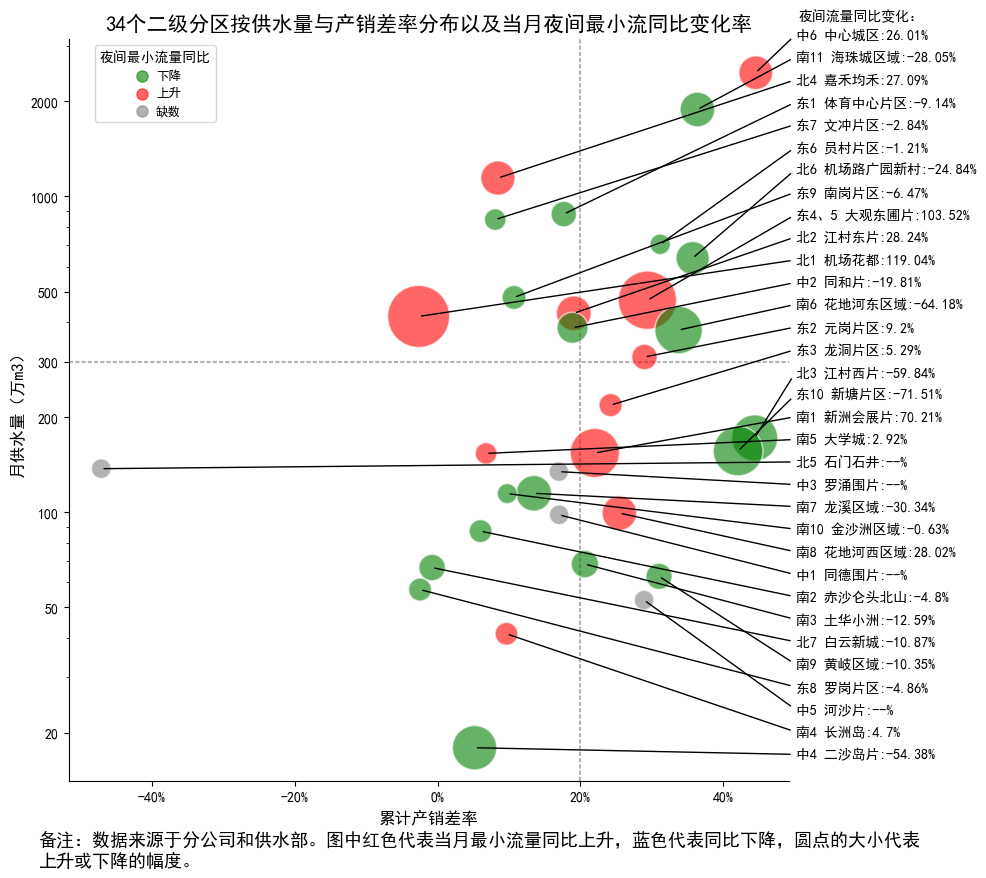

In [11]:
#更换月份
#------------------------------------
from matplotlib import ticker
f, ax = plt.subplots(figsize=(10,9),dpi=100)
sns.scatterplot(
    data=zone4,
    hue = '最小流颜色',palette=[ "g",'r',"grey"], hue_order = ["下降", "上升","缺数"],x="综合产销差", y="当月供水量",
    size="最小流绝对值", sizes=(200, 2000),alpha=.6,legend=False,ax=ax
    )
f.subplots_adjust(left=0.08, bottom=0.125, right=0.8, top=0.95)
#ax.set_position=(0.08, 0.125, 0.8, 0.95)
ax.set_title("34个二级分区按供水量与产销差率分布以及当月夜间最小流同比变化率",fontsize=15)
ax.set(yscale="log")
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.set_yticks([20,50,100,200, 300, 500,1000,2000])
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.axhline(y=300, color=".7", dashes=(2, 1), zorder=0)
ax.axvline(x=0.20, color=".7", dashes=(2, 1), zorder=0)
ax.set_xlabel("累计产销差率",fontsize=12)
ax.set_ylabel("月供水量（万m3）",fontsize=12)

#g.ax.legend(loc='upper center',ncol=4)
#g.ax.xaxis.grid(True, "minor", linewidth=.25)
#g.ax.yaxis.grid(True, "minor", linewidth=.25)
sns.despine()
for i in range(len(zone4)):
    ax.annotate(text[i], xy=xy[i], xytext=(ax.get_xlim()[1]+0.01,
             np.power(10,np.log10(ax.get_ylim()[1])-(np.log10(ax.get_ylim()[1])-np.log10(ax.get_ylim()[0]))/len(zone4)*i)   
                                            ),
            xycoords='data',
            arrowprops=dict( arrowstyle = "-",relpos=(0,0.5))
            )
f.text(0.81, 0.97,"夜间流量同比变化：",fontsize=10,) # ha='left', va='center'
f.text(0.05, 0.05,"备注：数据来源于分公司和供水部。图中红色代表当月最小流量同比上升，蓝色代表同比下降，圆点的大小代表\n上升或下降的幅度。",fontsize=13,ha='left', va='center')  
for col,explain in zip(["g",'r',"grey"],["下降", "上升","缺数"]):
    ax.scatter([], [], c=col, alpha=0.6,s=100,
                label=explain)
f.legend( title="夜间最小流量同比",loc="upper left", bbox_to_anchor=(0.1,0.95),labelspacing=0.5,columnspacing=0.2,handletextpad=0.1,markerscale=0.8,prop = {'size':9})    

plt.savefig(r'c:\Users\XieJie\Desktop\二级分区3月夜间最小流同比变化率.svg')

In [12]:
zone4=zone4[~np.isnan(zone4['综合产销差'])]
zone4= zone4.sort_values('当月供水量',ascending=False)
xy=list(zip(zone4['综合产销差'],zone4['当月供水量']))
text=[x+':'+y for x,y in zip(zone4['编号'],zone4['名称'])]

In [17]:
zone3

,分公司,编号,片区名称,年份,累计产销差率
0,中区,中1,同德围片,2020年,18.51
1,中区,中2,同和片,2020年,13.40
2,中区,中3,罗涌围片,2020年,28.05
3,中区,中4,二沙岛片,2020年,21.37
4,中区,中5,河沙片,2020年,46.62
...,...,...,...,...,...
63,北区,北3,江村西片,2021年,26.19
64,北区,北4,嘉禾均禾,2021年,-2.20
65,北区,北5,石门石井,2021年,-14.86
66,北区,北6,机场路广园新村,2021年,32.59


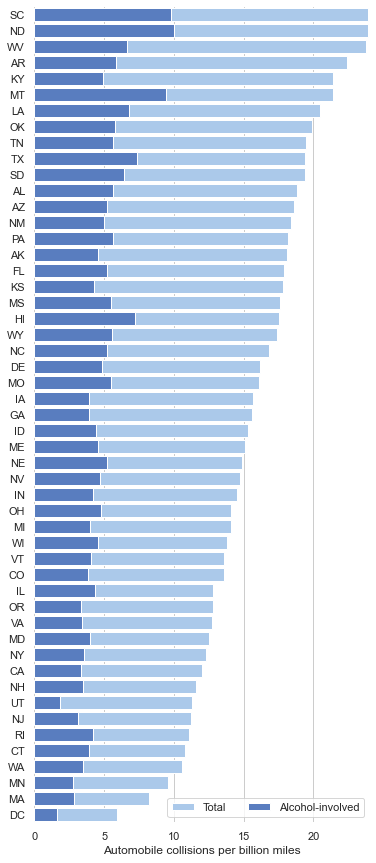

In [12]:
#完成售水计划比例图
sns.set_theme(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [24]:
icons = {'Victory Five':'image://https://static.wanplus.com/data/lol/team/6643_min.png',
        'LNG Esports':'image://https://static.wanplus.com/data/lol/team/200_min.png',
        'LGD Gaming':'image://https://static.wanplus.com/data/lol/team/198_min.png',
        'Dominus Esports': 'image://https://static.wanplus.com/data/lol/team/272_min.png',
        'Oh My God': 'image://https://static.wanplus.com/data/lol/team/63_min.png',
        'Rogue Warriors': 'image://https://static.wanplus.com/data/lol/team/5341_min.png',
        'Suning': 'image://https://static.wanplus.com/data/lol/team/4276_min.png',
        'Bilibili Gaming': 'image://https://static.wanplus.com/data/lol/team/5355_min.png',
        'Team WE': 'image://https://static.wanplus.com/data/lol/team/271_min.png',
        'Vici Gaming': 'image://https://static.wanplus.com/data/lol/team/204_min.png',
        'Royal Never Give Up': 'image://https://static.wanplus.com/data/lol/team/208_min.png',
        'EDward Gaming': 'image://https://static.wanplus.com/data/lol/team/68_min.png',
        'Top Esports': 'image://https://static.wanplus.com/data/lol/team/5356_min.png',
        'eStar': 'image://https://static.wanplus.com/data/lol/team/6921_min.png',
        'FunPlus Phoenix': 'image://https://static.wanplus.com/data/lol/team/5335_min.png',
        'Invictus Gaming': 'image://https://static.wanplus.com/data/lol/team/197_min.png',
        'JD Gaming': 'image://https://static.wanplus.com/data/lol/team/4043_min.png'
        }
{
        'name': 'JDG',
        'value': 1,
        'symbol': 'image://https://static.wanplus.com/data/lol/team/4043_min.png',
        'symbolSize': 40
    }


def IconChart(data_x):
    # 战队图标
    icon_data = []
    for team in data_x:
        icon_data.append(dict(name=team, value=1, symbol=icons[team]))
    icon = PictorialBar()
    icon.add_xaxis(data_x)
    icon.add_yaxis("",
                    icon_data,
                    label_opts=opts.LabelOpts(is_show=False),
                    symbol_pos='start',
                    symbol_size=40,
                    is_symbol_clip=False,
                    itemstyle_opts={"normal": {
                        'shadowBlur': 10,
                        'shadowColor': 'rgba(0, 0, 0, 0.5)',
                        'shadowOffsetX': 10,
                        'shadowOffsetY': 10,}
                    })
    icon.set_global_opts(
                yaxis_opts=opts.AxisOpts(is_show=False),
                xaxis_opts=opts.AxisOpts(is_show=False)
    )
    icon.reversal_axis()
    return icon

{'name': 'JDG',
 'value': 1,
 'symbol': 'image://https://static.wanplus.com/data/lol/team/4043_min.png',
 'symbolSize': 40}

In [58]:
def bar_chart_result(data_x, data_y, desc='', first_chart=False):
    chart = Bar(init_opts=opts.InitOpts(theme='dark', height='800px', width='980px'))
    chart.add_xaxis(data_x)
    chart.add_yaxis('', data_y, category_gap='60%')
    chart.set_series_opts(label_opts=opts.LabelOpts(position="insideLeft",
                                                    vertical_align='middle',
                                                    horizontal_align='top',
                                                    font_size=18,
                                                    font_weight='bold',
                                                    formatter='  {c} %'),
                          itemstyle_opts={
                                            'opacity': 0.9,
                                            'shadowBlur': 10,
                                            'shadowOffsetX': 10,
                                            'shadowOffsetY': 10,
                                            'shadowColor': 'rgba(0, 0, 0, 0.5)',
                                            "barBorderRadius": [30, 30, 30, 30]
                                        }
    )
    if first_chart:
        chart.set_global_opts(
                    title_opts=opts.TitleOpts(title="保障开发区供水管网改造项目进度", pos_left='5%', pos_top='2%',
                                            title_textstyle_opts=opts.TextStyleOpts(font_size=20),),
                    yaxis_opts=opts.AxisOpts(is_show=True,axislabel_opts=opts.LabelOpts(font_size=15)),
                    xaxis_opts=opts.AxisOpts(is_scale=True,
                                            name=desc,
                                            type_="value",
                                            name_location="middle",
                                            position='top',
                                            name_textstyle_opts=opts.TextStyleOpts(font_size=14, font_weight='bold',),
                                            axisline_opts=opts.AxisLineOpts(is_show=False),
                                            axislabel_opts=opts.LabelOpts(is_show=False),
                                            splitline_opts=opts.SplitLineOpts(is_show=False),
                                            axistick_opts=opts.AxisTickOpts(is_show=False),
                                        ),
                    visualmap_opts=opts.VisualMapOpts(is_show=False,
                                                    is_piecewise=True,
                                                    dimension=0,
                                                    pieces=[{"max": 0, "color": 'green'},
                                                            {"min": 1, "color": 'red'},
                                                            ]),
                    tooltip_opts=opts.TooltipOpts(is_show=True, formatter='{b}: {c}%'),
                    graphic_opts=[opts.GraphicGroup(
                                        graphic_item=opts.GraphicItem(
                                            left="5%", top="5%"),
                                        children=[
                                            opts.GraphicRect(
                                                graphic_item=opts.GraphicItem(
                                                    z=0, left="center", top="middle"
                                                ),
                                                graphic_shape_opts=opts.GraphicShapeOpts(
                                                    width=900, height=900),
                                                graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                                    fill="rgba(0,0,0,0)",
                                                    stroke="#fff",
                                                    line_width=2,
                                                    shadow_blur=20,
                                                    shadow_offset_x=5,
                                                    shadow_offset_y=5,
                                                    shadow_color="#4169E1",
                                                ),
                                            ),
                                    ]),

                    ]
            )
    else:
        chart.set_global_opts(
                    yaxis_opts=opts.AxisOpts(is_show=False),
                    xaxis_opts=opts.AxisOpts(is_scale=True,
                                            name=desc,
                                            type_="value",
                                            name_location="middle",
                                            position='top',
                                            name_textstyle_opts=opts.TextStyleOpts(font_size=14, font_weight='bold',),
                                            axisline_opts=opts.AxisLineOpts(is_show=False),
                                            axislabel_opts=opts.LabelOpts(is_show=False),
                                            splitline_opts=opts.SplitLineOpts(is_show=False),
                                            axistick_opts=opts.AxisTickOpts(is_show=False),
                                        ),
                    visualmap_opts=opts.VisualMapOpts(is_show=False,
                                                    is_piecewise=True,
                                                    dimension=0,
                                                    pieces=[{"max": 0, "color": 'green'},
                                                            {"min": 1, "color": 'red'},
                                                            ]),
                    tooltip_opts=opts.TooltipOpts(is_show=True, formatter='{b}: {c}%'),
                    graphic_opts=[opts.GraphicGroup(
                                        graphic_item=opts.GraphicItem(
                                            left="5%", top="5%"),
                                        children=[
                                            opts.GraphicRect(
                                                graphic_item=opts.GraphicItem(
                                                    z=0, left="center", top="middle"
                                                ),
                                                graphic_shape_opts=opts.GraphicShapeOpts(
                                                    width=900, height=900),
                                                graphic_basicstyle_opts=opts.GraphicBasicStyleOpts(
                                                    fill="rgba(0,0,0,0)",
                                                    stroke="#fff",
                                                    line_width=2,
                                                    shadow_blur=20,
                                                    shadow_offset_x=5,
                                                    shadow_offset_y=5,
                                                    shadow_color="#4169E1",
                                                ),
                                            ),
                                    ]),

                    ]
            )
    chart.reversal_axis()
    return chart

In [60]:
data_x = ['大敦一标\n(4月30日前)','大敦二标\n(6月30日前)','黄埔一标\n(9月30日前)','黄埔二标\n(9月30日前)','黄埔广新路\n(4月30日前)']

bar_spring = bar_chart_result(data_x, [89.17,82.40,58.09,35.56,93.15], '上月进度')
bar_summer = bar_chart_result(data_x, [98.12,82.40,58.09,35.56,93.15], '本周进度')
bar_diff = bar_chart_result(data_x, [8.95,0,0,0,0], '本周比上月增长', True)

grid = Grid(init_opts=opts.InitOpts(theme='dark', width='980px', height='800px'))

grid.add(bar_diff, is_control_axis_index=False, grid_opts=opts.GridOpts(pos_left='15%', pos_right='68%', pos_top='10%'))
grid.add(bar_spring, is_control_axis_index=False, grid_opts=opts.GridOpts(pos_left='35%', pos_right='40%', pos_top='10%'))
grid.add(bar_summer, is_control_axis_index=False, grid_opts=opts.GridOpts(pos_left='65%', pos_top='10%'))
#grid.add(icon, is_control_axis_index=False, grid_opts=opts.GridOpts(pos_left='8%', pos_right='80%', pos_top='10%'))
grid.render_notebook()

make_snapshot(snapshot,grid.render(), "进度.png",
              is_remove_html=True,
              # 延迟时间，避免图还没渲染完成就生成了图片，造成图片不完整
            delay = 2,
            # 像素比例，用于调节图片质量
            pixel_ratio = 5,  
            )

In [19]:
from pyecharts.charts import Page

def Page_total():
    page = (
        Page(layout=Page.DraggablePageLayout)
            .add(
            sunburst,
            c1,
            c2,
            bar,
            
        )
    )
    page.render('page.html')
Page_total()
os.system('page.html')

-1

In [20]:
Page.save_resize_html('page.html',
                          cfg_file='chart_config.json',
                          dest='dashboard.html')

'<!DOCTYPE html>\n<html>\n<head>\n    <meta charset="UTF-8">\n    <title>Awesome-pyecharts</title>\n            <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/jquery-ui.min.js"></script>\n        <script type="text/javascript" src="https://assets.pyecharts.org/assets/ResizeSensor.js"></script>\n\n            <link rel="stylesheet"  href="https://assets.pyecharts.org/assets/jquery-ui.css">\n\n</head>\n<body>\n    <style>.box {  }; </style>\n        \n    <div class="box">\n                <div id="f574714ce5d049619cd519aab68c38a7" class="chart-container" style="position: absolute; width: 439px; height: 399px; top: 42px; left: 8px;"></div>\n    <script>\n        var chart_f574714ce5d049619cd519aab68c38a7 = echarts.init(\n            document.getElementBy

In [23]:
os.system('dashboard.html')

-1